In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


In [4]:
mobile = pd.read_csv("C:\\Users\\somre\\Downloads\\Flipkart Mobile - 2.csv")
mobile

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1.50
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1.73
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3.42
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6.77


In [5]:
mobile.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [6]:
mobile.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [7]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

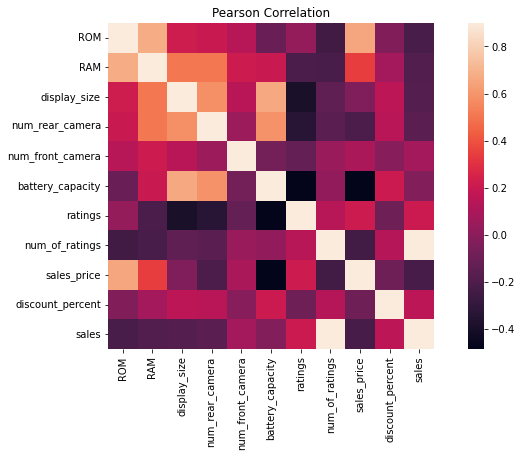

In [8]:
#heatmap correlation
plt.figure(figsize = (12,6))
sns.heatmap(mobile.corr(), vmax = 0.9, square = True)
plt.title("Pearson Correlation")
plt.show()

In [9]:
#handling categorical data
df = pd.get_dummies(mobile, drop_first = True)
df.head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS,screen_size_Medium,screen_size_Small,screen_size_Very Large,screen_size_Very Small
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,...,0,0,0,0,0,0,0,1,0,0
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,...,0,0,0,0,0,1,1,0,0,0
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#split data
X = df.drop('sales_price', axis = 1)
y = df['sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(301, 153)
(301,)
(129, 153)
(129,)


#### Regression Model

In [11]:
#Linear Regression
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

Wall time: 61.5 ms


-5439142078.463281

In [12]:
#Ridge Regression
ridge = RidgeCV()
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

Wall time: 23.5 ms


0.9576420994886806

In [13]:
#Lasso Regression
lasso = LassoCV()
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

Wall time: 76.6 ms


0.6926538816511842

In [19]:
#compare MLA
MLA = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
clfs = [LinearRegression(), RidgeCV(), LassoCV()]
result = []

for clff in clfs:
    clff.fit(X_train, y_train)
    acc = clff.score(X_test, y_test)
    result.append(acc)
    
result_df = pd.DataFrame(result, index = MLA)
result_df.columns = ["Accuracy"]
result_df.sort_values(by = "Accuracy", ascending = False)


,Accuracy
Ridge Regression,9.576421e-01
Lasso Regression,6.926539e-01
Linear Regression,-5.439142e+09


### Ridge Regression model is the best score result

In [17]:
#prediction
y_pred = ridge.predict(X_test)
print(y_pred)

[13355.08429937 14467.72678722 44109.68107695  7074.66191234
 59530.00286757 21752.76653923 32779.06010456 13039.88283262
 12882.87922137  1847.87882455 47369.57149363 13487.49487536
 33149.39752782 13259.68876652 45893.5096898  10691.35171934
 15314.30838131 24629.88335963 13768.00584364 25441.91341974
 17933.41574837  8162.04688538 14081.33242553 59687.00647882
 69214.39472741 19726.5635215  18312.72823768 20252.65023527
  8769.43984718 62339.50295982 29938.08807108 32021.76023663
 23642.27530102 36055.74422801 34103.10064709 20589.32132667
 16218.79449733 11375.88152626 32652.89348768 11080.80618433
 17811.70620289 11473.1344295  35396.97785306 17253.85799565
 46985.71505559 25579.77700981 11511.96537612 10952.08214289
 14576.74901989 15564.30981751 95517.95791445 12629.23718154
 69258.79401075 11236.66156937 23848.8263493   9070.3761576
 10848.63809676 12968.9685967  20851.85584907 12860.65310317
 17878.19190209  6470.8846277  13971.22274707  8665.99580105
 27580.71432141  9956.570

In [20]:
#check MAE, MSE, RMSE, R-Squared
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))
print('R Squared : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  2053.67
Mean Squared Error :  17486804.34
Root Mean Squared Error :  45.317435938058104
R Squared :  0.9576420994886806


C:\Users\somre\Anacondanew\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


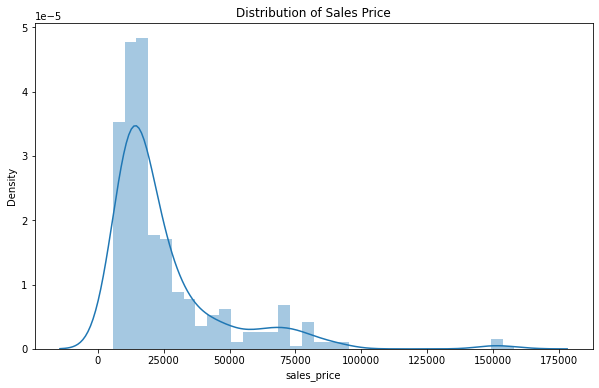

In [21]:
#distribution
plt.figure(figsize = (10,6))
sns.distplot(df['sales_price'])
plt.title("Distribution of Sales Price")
plt.show()


Text(0.5, 0, 'log10(Sales Price)')

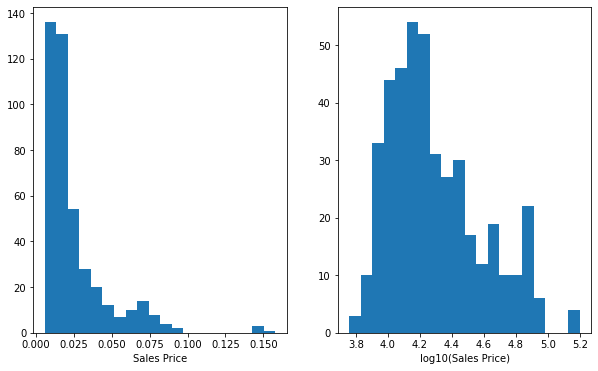

In [22]:
#change distribution
figure(figsize = (10,6))
subplot(1,2,1)
hist(df['sales_price'] * 1e-6, 20);
xlabel("Sales Price")
subplot(1, 2, 2)
hist(log10(mobile['sales_price']),20);
xlabel("log10(Sales Price)")


### Check Feature Importance

In [23]:
#defining feature
coef = pd.Series(ridge.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

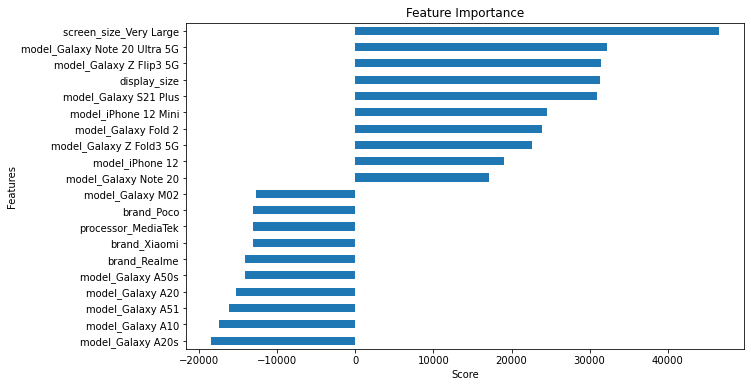

In [24]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

#### Visualisation

C:\Users\somre\Anacondanew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


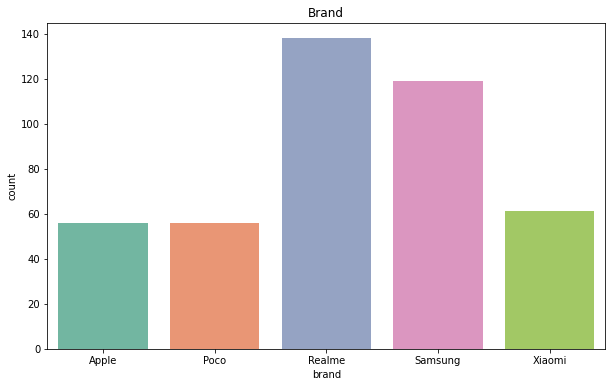

In [25]:
#visualize brand
plt.figure(figsize = (10,6))
sns.countplot(mobile['brand'], palette = 'Set2')
plt.title("Brand")
plt.show()


C:\Users\somre\Anacondanew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


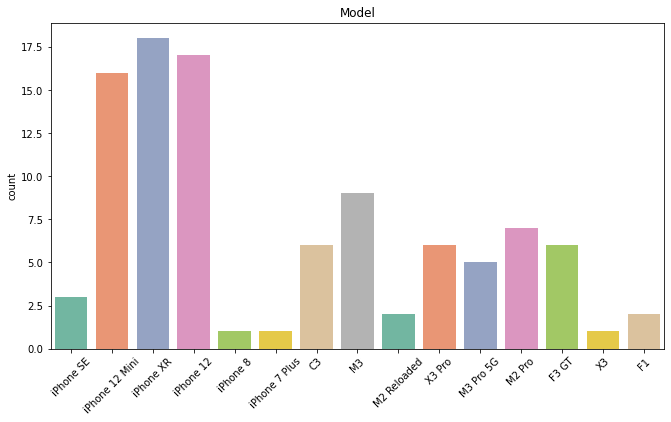

In [26]:
#visualize 100 row data of model
plt.figure(figsize = (11,6))
chart = sns.countplot(mobile['model'][0:100].values, palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Model")
plt.show()

C:\Users\somre\Anacondanew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


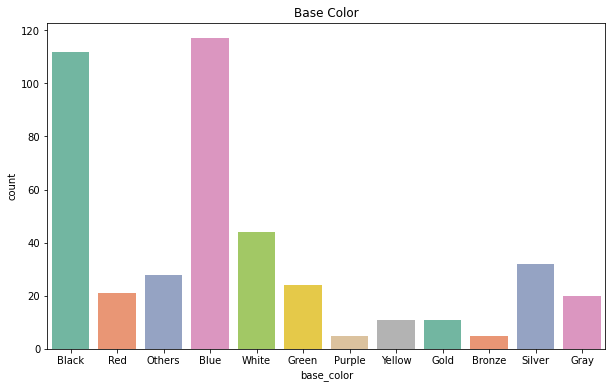

In [27]:
#visualize color
plt.figure(figsize = (10,6))
sns.countplot(mobile['base_color'], palette = 'Set2')
plt.title("Base Color")
plt.show()

C:\Users\somre\Anacondanew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


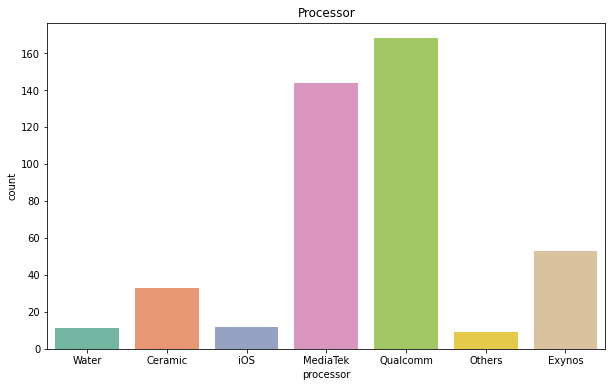

In [28]:
#visualize processor
plt.figure(figsize = (10,6))
sns.countplot(mobile['processor'], palette = 'Set2')
plt.title("Processor")
plt.show()


<AxesSubplot:xlabel='battery_capacity', ylabel='Density'>

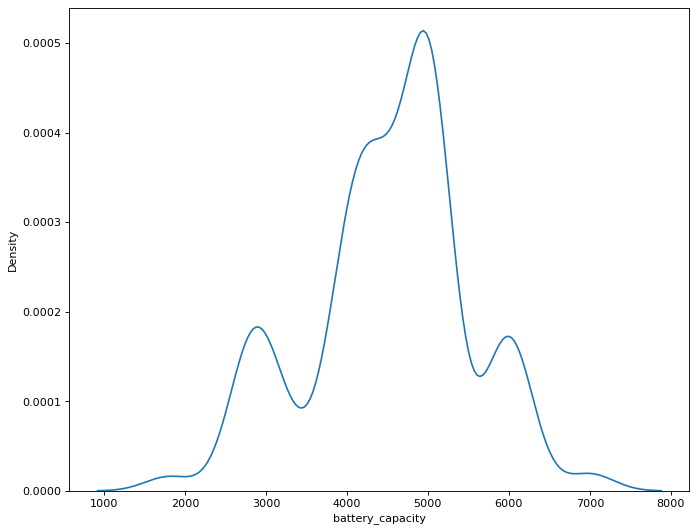

In [39]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
sns.kdeplot(df['battery_capacity'])

### Number of Mobiles based on the screen size

C:\Users\somre\Anacondanew\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


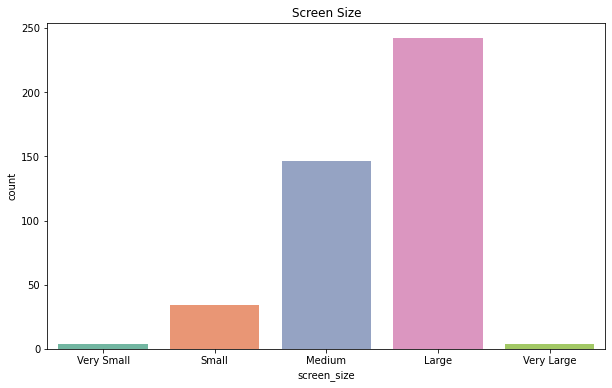

In [29]:
#visualize screen size
plt.figure(figsize = (10,6))
sns.countplot(mobile['screen_size'], palette = 'Set2')
plt.title("Screen Size")
plt.show()


In [30]:
#group brand & color
brand_color = mobile.groupby(['brand', 'base_color']).size().reset_index(name = 'Count')
print(brand_color)

      brand base_color  Count
0     Apple      Black     12
1     Apple       Blue      8
2     Apple       Gold      1
3     Apple      Green      6
4     Apple     Others      4
5     Apple     Purple      4
6     Apple        Red      7
7     Apple      White     11
8     Apple     Yellow      3
9      Poco      Black     17
10     Poco       Blue     18
11     Poco     Bronze      2
12     Poco       Gray      3
13     Poco      Green      2
14     Poco     Others      3
15     Poco        Red      3
16     Poco     Silver      3
17     Poco     Yellow      5
18   Realme      Black     26
19   Realme       Blue     43
20   Realme       Gray      9
21   Realme      Green      5
22   Realme     Others      9
23   Realme     Purple      1
24   Realme        Red      2
25   Realme     Silver     24
26   Realme      White     16
27   Realme     Yellow      3
28  Samsung      Black     38
29  Samsung       Blue     33
30  Samsung     Bronze      3
31  Samsung       Gold      2
32  Samsun

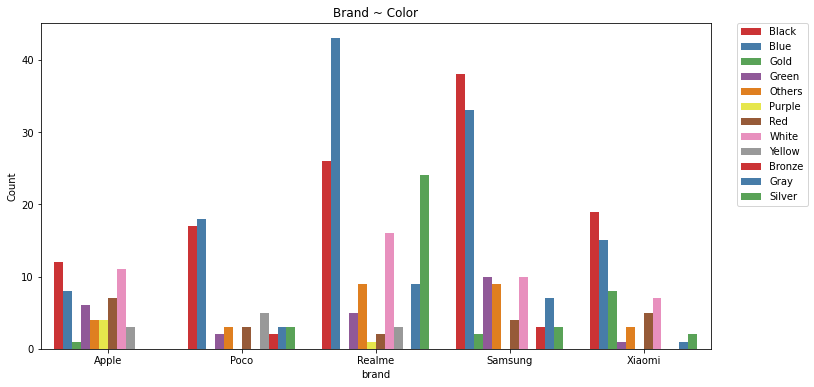

In [31]:
#viusalize brand ~ color
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'base_color', data = brand_color, palette = 'Set1')
plt.title("Brand ~ Color")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

In [32]:
#group brand & processor
brand_processor = mobile.groupby(['brand', 'processor']).size().reset_index(name = 'Count')
print(brand_processor)

      brand processor  Count
0     Apple   Ceramic     33
1     Apple     Water     11
2     Apple       iOS     12
3      Poco  MediaTek     23
4      Poco  Qualcomm     33
5    Realme  MediaTek     91
6    Realme    Others      6
7    Realme  Qualcomm     41
8   Samsung    Exynos     53
9   Samsung  MediaTek     25
10  Samsung    Others      3
11  Samsung  Qualcomm     38
12   Xiaomi  MediaTek      5
13   Xiaomi  Qualcomm     56


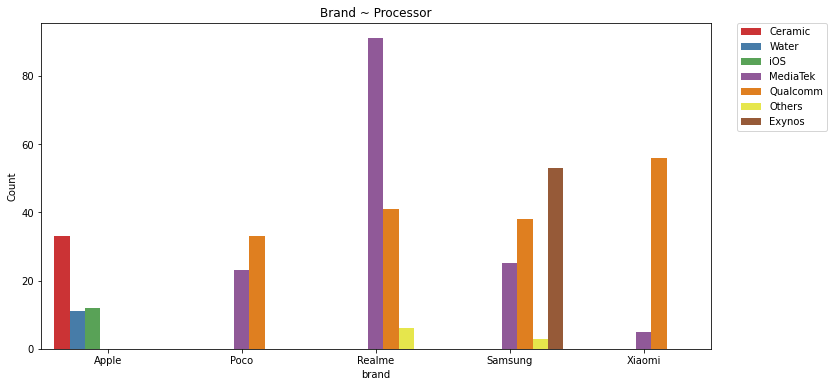

In [33]:
#viusalize brand ~ processor
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'processor', data = brand_processor, palette = 'Set1')
plt.title("Brand ~ Processor")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

In [34]:
#group brand & size
brand_size = mobile.groupby(['brand', 'screen_size']).size().reset_index(name = 'Count')
print(brand_size)

      brand screen_size  Count
0     Apple      Medium     35
1     Apple       Small     17
2     Apple  Very Small      4
3      Poco       Large     54
4      Poco      Medium      2
5    Realme       Large     82
6    Realme      Medium     56
7   Samsung       Large     82
8   Samsung      Medium     26
9   Samsung       Small      7
10  Samsung  Very Large      4
11   Xiaomi       Large     24
12   Xiaomi      Medium     27
13   Xiaomi       Small     10


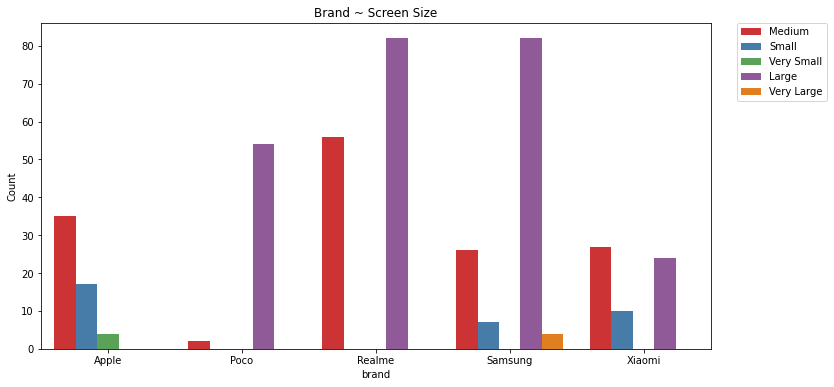

In [35]:
#viusalize brand ~ processor
plt.figure(figsize = (12,6))
sns.barplot(x = 'brand', y = 'Count', hue = 'screen_size', data = brand_size, palette = 'Set1')
plt.title("Brand ~ Screen Size")
plt.legend(bbox_to_anchor = (1.04,1), borderaxespad = 0)
plt.show()

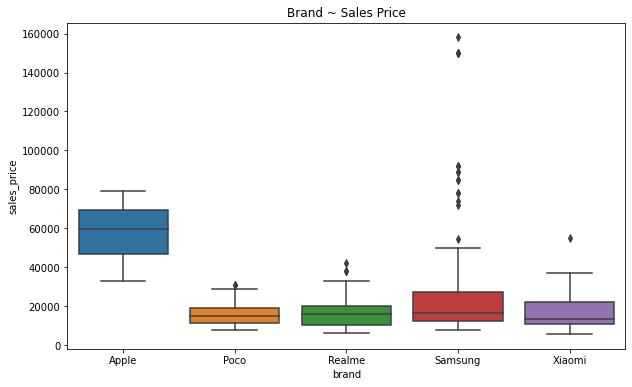

In [36]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'brand',y = 'sales_price', data = mobile)
plt.title("Brand ~ Sales Price")
plt.show()

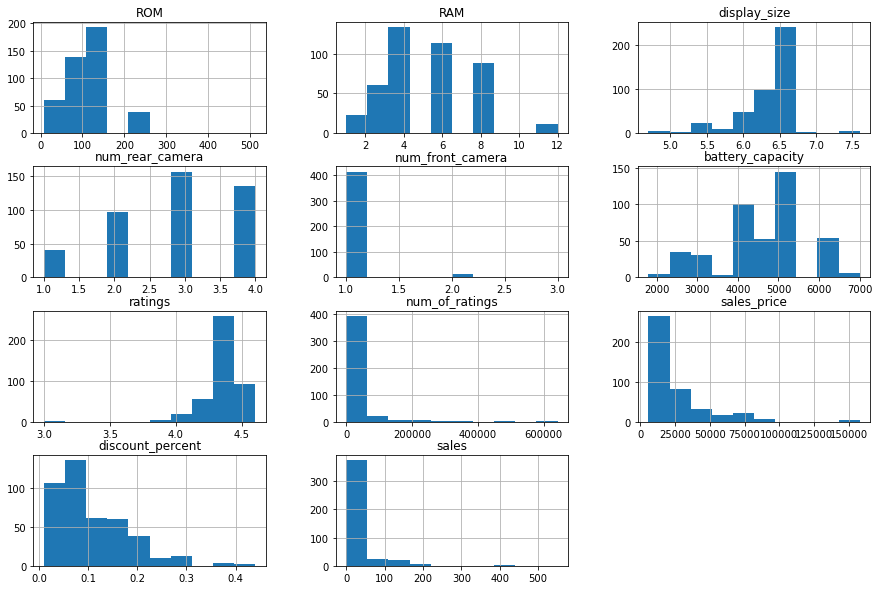

In [37]:
mobile.hist(figsize = (15,10))
plt.show()

<AxesSubplot:xlabel='ratings', ylabel='Count'>

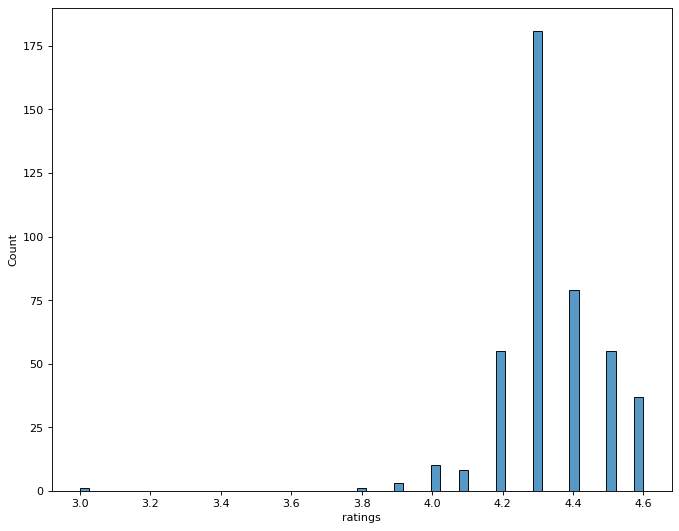

In [38]:
import seaborn as sns
figure(figsize=(10, 8), dpi=80)
sns.histplot(df['ratings'])